## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Project Description: Provide a brief overview of the project, its purpose, and what it aims to achieve.

*Installation:

*Business Questions:

*Preparing the The Data

*Key Points to note

*Which genres of movies are the most profitable?

*What types of movies are being created the most

*Further Investigation

*Conclusion

I Analysed this project based on

Genre Trend/Popularity
Financial/profits/costs
Target Market/Audience/demographics- gender/enthnicty/age/Income class
I used the financial data(gross and profit) as the determining factors to measure success

This analysis focuses on identifying lucrative market niches, understanding audience preferences, and providing actionable insights to guide Microsoft in the selection and production of profitable film genres for their new venture.

The analysis used the data on movie gross and movie reviews

In [2]:
# Your code here - remember to use markdown cells for comments as well!
#Import Libraries
#Read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [9]:
#loading data into a dataframe and first look at the data
Gross_Movies = pd.read_csv("C:/Users/HP/Documents/Flatiron/Project/phase1/dsc-phase-1-project Updated/zippedData/tn.movie_budgets.csv.gz", compression='gzip',header=0,)
Gross_Movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [48]:
#summary information about the DataFrame 
Gross_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [49]:
#Getting more information about the data- Checking to see if there are duplicates
duplicates = Gross_Movies.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [10]:
#Converting the columns to strings to be able to be to carry further analysis
Gross_Movies['production_budget'] = Gross_Movies['production_budget'].astype(str)
Gross_Movies['domestic_gross'] = Gross_Movies['domestic_gross'].astype(str)
Gross_Movies['worldwide_gross'] = Gross_Movies['worldwide_gross'].astype(str)
print(Gross_Movies.dtypes)

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object


In [11]:
#removing special characters
Gross_Movies['production_budget'] = Gross_Movies['production_budget'].str.replace('$', '').str.replace(',', '')
Gross_Movies['domestic_gross'] = Gross_Movies['domestic_gross'].str.replace('$', '').str.replace(',', '')
Gross_Movies['worldwide_gross'] = Gross_Movies['worldwide_gross'].str.replace('$', '').str.replace(',', '')
Gross_Movies

C:\Users\HP\AppData\Local\Temp\ipykernel_4820\3011107977.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Gross_Movies['production_budget'] = Gross_Movies['production_budget'].str.replace('$', '').str.replace(',', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_4820\3011107977.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Gross_Movies['domestic_gross'] = Gross_Movies['domestic_gross'].str.replace('$', '').str.replace(',', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_4820\3011107977.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [12]:
Gross_Movies['production_budget'] = Gross_Movies['production_budget'].astype(float)
Gross_Movies['domestic_gross'] = Gross_Movies['domestic_gross'].astype(float)
Gross_Movies['worldwide_gross'] = Gross_Movies['worldwide_gross'].astype(float)
Gross_Movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [13]:
#Getting the most profitable movies domestically and world wide by subtracting the gross and the budget
#Add profit column by list method
Gross_Movies['Domestic Profit'] = Gross_Movies['domestic_gross'] - Gross_Movies['production_budget']
Gross_Movies['Worlwide Profit'] = Gross_Movies['worldwide_gross'] - Gross_Movies['production_budget']
Gross_Movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worlwide Profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7000.0,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,42482.0,2.344950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3662.0,-3.662000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1400.0,-1.400000e+03


In [74]:
#Narrowing down the data to only the latest 10years to make the analysis more relevant

#Convert the date column 'release_date' to a date time format
Gross_Movies['release_date'] = pd.to_datetime(Gross_Movies['release_date'])
#Getting the latest date of the data set
latest_date = Gross_Movies['release_date'].max()
#Getting the start date for the 10years period parameters
start_date = latest_date - pd.DateOffset(years=10)
#Getting the movies in the 10year period from the start date to the latest date
Gross_Movies10 = Gross_Movies[(Gross_Movies['release_date'] >= start_date) & (Gross_Movies['release_date'] <= latest_date)]
Gross_Movies10

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worlwide Profit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0,1.747311e+09
...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-15000.0,-1.500000e+04
5771,72,2015-05-19,Family Motocross,10000.0,0.0,0.000000e+00,-10000.0,-1.000000e+04
5772,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4416.0,-4.416000e+03
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7000.0,-7.000000e+03


In [75]:
latest_date = Gross_Movies['release_date'].max()
latest_date

Timestamp('2020-12-31 00:00:00')

In [15]:
#Sorting the data in ascending order to find the most profitable movies domestically 
Gross_Movies10.sort_values(by='Domestic Profit', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worlwide Profit
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0,1.747311e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,500059566.0,1.148258e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09
43,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,408581744.0,1.042521e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09
...,...,...,...,...,...,...,...,...
31,32,2012-05-18,Battleship,220000000.0,65233400.0,3.134777e+08,-154766600.0,9.347772e+07
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
12,13,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-185697885.0,-1.499788e+07
13,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,-201941321.0,7.778100e+06


In [16]:
#To get the 10 most profitable movies domestically
Top_Domestic = Gross_Movies10.sort_values(by='Domestic Profit', ascending=False).head(10)
Top_Domestic

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worlwide Profit
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0,1.747311e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,500059566.0,1.148258e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09
43,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,408581744.0,1.042521e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09
134,35,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,344014165.0,1.099200e+09
44,45,2016-12-16,Rogue One: A Star Wars Story,200000000.0,532177324.0,1.049103e+09,332177324.0,8.491029e+08
537,38,2012-03-23,The Hunger Games,80000000.0,408010692.0,6.779234e+08,328010692.0,5.979234e+08
437,38,2017-12-20,Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.644962e+08,314508916.0,8.744962e+08


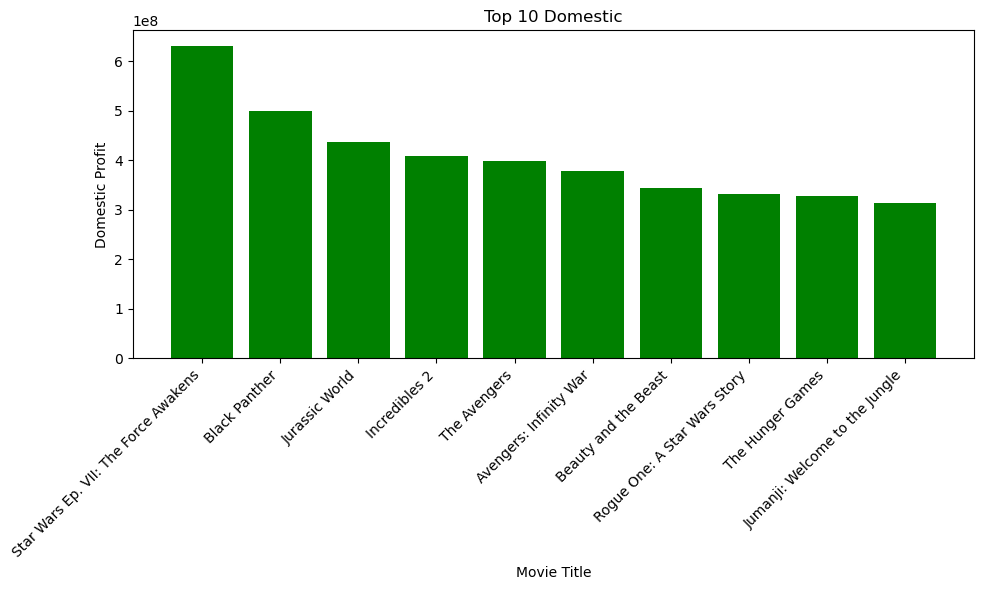

In [17]:
#presenting the top domestic movies each year in a bar graph
#Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(Top_Domestic['movie'], Top_Domestic['Domestic Profit'], color='green')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Profit')
plt.title('Top 10 Domestic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
#presenting the top worldwide movies each year in a bar graph
Gross_Movies10.sort_values(by='Worlwide Profit', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worlwide Profit
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0,1.747311e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,163007020.0,1.328723e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09
...,...,...,...,...,...,...,...,...
480,81,2019-12-31,Army of the Dead,90000000.0,0.0,0.000000e+00,-90000000.0,-9.000000e+07
341,42,2019-06-14,Men in Black: International,110000000.0,3100000.0,3.100000e+06,-106900000.0,-1.069000e+08
193,94,2011-03-11,Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-128607242.0,-1.104502e+08
194,95,2020-12-31,Moonfall,150000000.0,0.0,0.000000e+00,-150000000.0,-1.500000e+08


In [19]:
Top_Worldwide = Gross_Movies10.sort_values(by='Worlwide Profit', ascending=False).head(10)
Top_Worldwide

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worlwide Profit
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0,1.747311e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,163007020.0,1.328723e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,256193157.0,1.216693e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,500059566.0,1.148258e+09
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,247719760.0,1.135773e+09
155,56,2013-11-22,Frozen,150000000.0,400738009.0,1.272470e+09,250738009.0,1.122470e+09
134,35,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,344014165.0,1.099200e+09


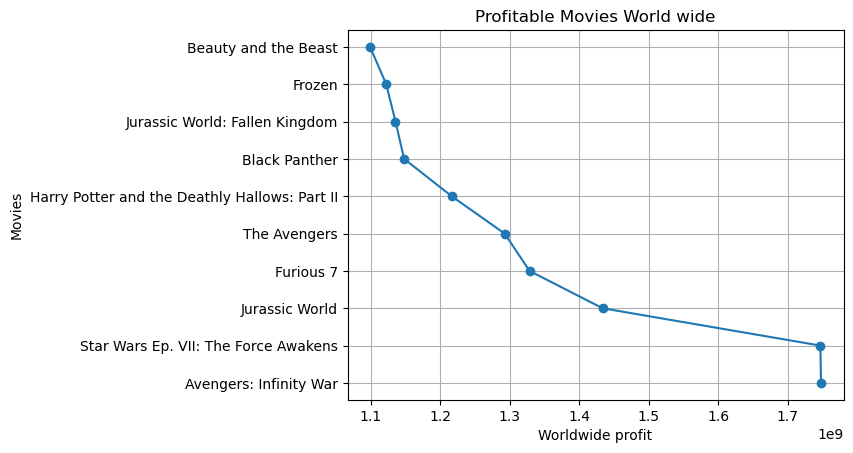

In [163]:
# Data
x_values = Top_Worldwide['movie']  # Horizontal positions
y_values = Top_Worldwide['Worlwide Profit']       # Vertical positions

# Create a horizontal line graph
plt.plot(y_values, x_values, marker='o', linestyle='-')

# Labels and title
plt.xlabel('Worldwide profit')
plt.ylabel('Movies')
plt.title('Profitable Movies World wide')

# Show the graph
plt.grid(True)  # Optionally add grid lines
plt.show()


In [24]:
#Assigning genres
Movies = Top_Domestic['movie']
print(Movies)

5      Star Wars Ep. VII: The Force Awakens
41                            Black Panther
33                           Jurassic World
43                            Incredibles 2
26                             The Avengers
6                    Avengers: Infinity War
134                    Beauty and the Beast
44             Rogue One: A Star Wars Story
537                        The Hunger Games
437          Jumanji: Welcome to the Jungle
Name: movie, dtype: object


In [22]:
#To find out about the movie genres from a set of data that has classified them
Top_Genres = pd.read_csv("C:/Users/HP/Documents/Flatiron/Project/phase1/dsc-phase-1-project Updated/zippedData/imdb.title.basics.csv.gz", compression='gzip',header=0,)
Top_Genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [23]:
#Iterating through top Top_Genres database to find out the genre of the Top domestic movies
for index, row in Top_Domestic.iterrows():
    name = row['movie'] 
    matching_row = Top_Genres[Top_Genres['original_title'] == name]
   
    if not matching_row.empty:
      
        genre_name = matching_row['genres'].values[0]
        print(f"Match found for Name: {name}")
        print(f"Genre ID: {genre_name}")

Match found for Name: Black Panther
Genre ID: Action,Adventure,Sci-Fi
Match found for Name: Jurassic World
Genre ID: Action,Adventure,Sci-Fi
Match found for Name: Incredibles 2
Genre ID: Action,Adventure,Animation
Match found for Name: The Avengers
Genre ID: Action,Adventure,Sci-Fi
Match found for Name: Avengers: Infinity War
Genre ID: Action,Adventure,Sci-Fi
Match found for Name: Beauty and the Beast
Genre ID: Family,Fantasy,Musical
Match found for Name: The Hunger Games
Genre ID: Action,Adventure,Sci-Fi
Match found for Name: Jumanji: Welcome to the Jungle
Genre ID: Action,Adventure,Comedy


In [25]:
#create a dataframe after identifying the genres
data = {
    "Movies": [
        "Star Wars Ep. VII: The Force Awakens",
        "Black Panther",
        "Jurassic World",
        "Incredibles 2",
        "The Avengers",
        "Avengers: Infinity War",
        "Beauty and the Beast",
        "Rogue One: A Star Wars Story",
        "The Hunger Games",
        "Jumanji: Welcome to the Jungle",
    ],
    "Genres": [
        ['Action', 'Adventure', 'Fantasy'],
        ['Action', 'Adventure', 'Sci-Fi'],
        ['Action', 'Adventure', 'Sci-Fi'],
        ['Action','Adventure','Animation'],
        ['Action', 'Adventure', 'Sci-Fi'],
        ['Action', 'Adventure', 'Sci-Fi'],
        ['Family,Fantasy,Musical'],
        ['Action', 'Adventure', 'Fantasy'],
        ['Action', 'Adventure', 'Sci-Fi'],
        ['Action','Adventure','Comedy'],
    ],
}

Genres_id = pd.DataFrame(data)
print(Genres_id)


                                 Movies                          Genres
0  Star Wars Ep. VII: The Force Awakens    [Action, Adventure, Fantasy]
1                         Black Panther     [Action, Adventure, Sci-Fi]
2                        Jurassic World     [Action, Adventure, Sci-Fi]
3                         Incredibles 2  [Action, Adventure, Animation]
4                          The Avengers     [Action, Adventure, Sci-Fi]
5                Avengers: Infinity War     [Action, Adventure, Sci-Fi]
6                  Beauty and the Beast        [Family,Fantasy,Musical]
7          Rogue One: A Star Wars Story    [Action, Adventure, Fantasy]
8                      The Hunger Games     [Action, Adventure, Sci-Fi]
9        Jumanji: Welcome to the Jungle     [Action, Adventure, Comedy]


In [26]:
#Adding the genre column

new_values = []
for index, row in Top_Domestic.iterrows():
    movie_title = row['movie']
    matching_row = Genres_id[Genres_id['Movies'] == movie_title]
    
    if not matching_row.empty:
        genre_names = matching_row['Genres'].values[0]
        new_values.append(', '.join(genre_names))
        
    else:
        new_values.append(None)
        
Top_Domestic['Genre Name'] = new_values
Top_Domestic

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worlwide Profit,Genre Name
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0,1.747311e+09,"Action, Adventure, Fantasy"
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,500059566.0,1.148258e+09,"Action, Adventure, Sci-Fi"
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,"Action, Adventure, Sci-Fi"
43,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,408581744.0,1.042521e+09,"Action, Adventure, Animation"
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09,"Action, Adventure, Sci-Fi"
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,"Action, Adventure, Sci-Fi"
134,35,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,344014165.0,1.099200e+09,"Family,Fantasy,Musical"
44,45,2016-12-16,Rogue One: A Star Wars Story,200000000.0,532177324.0,1.049103e+09,332177324.0,8.491029e+08,"Action, Adventure, Fantasy"
537,38,2012-03-23,The Hunger Games,80000000.0,408010692.0,6.779234e+08,328010692.0,5.979234e+08,"Action, Adventure, Sci-Fi"
437,38,2017-12-20,Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.644962e+08,314508916.0,8.744962e+08,"Action, Adventure, Comedy"


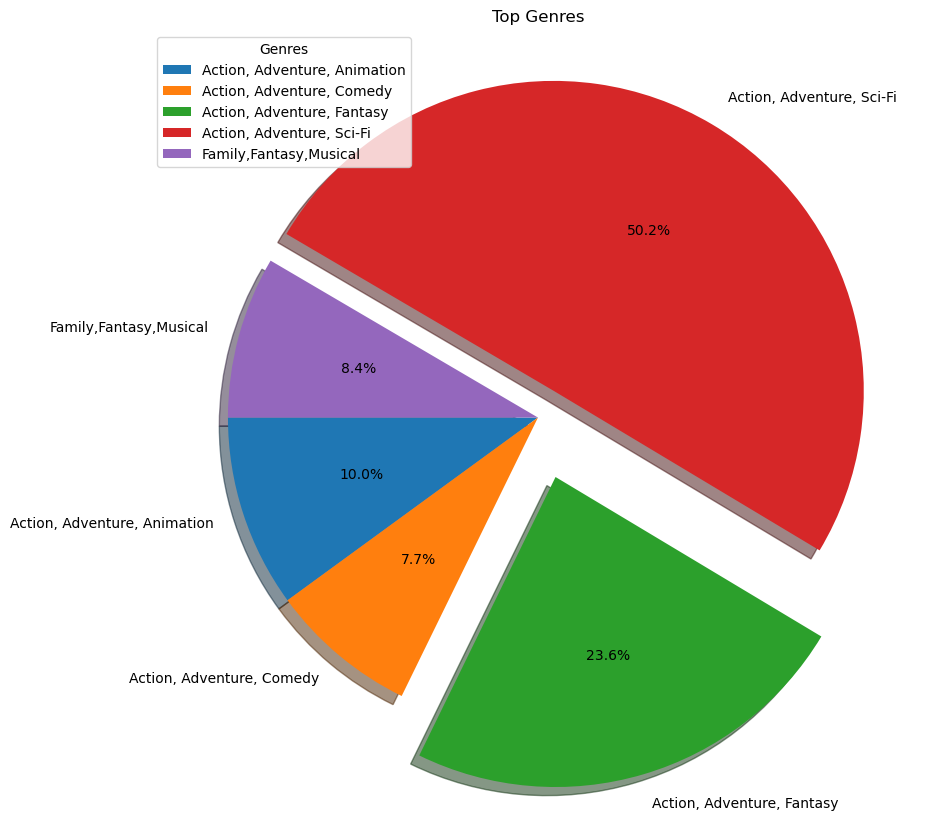

In [137]:
#Creating a pie chart for the top Genres Domestically

Grouped_data = {
    'Value': Top_Domestic['Domestic Profit'],
    'Category': Top_Domestic['Genre Name']
}

data_Chart = pd.DataFrame(Grouped_data)

# Combine similar genres categories
# Define a mapping of categories to combine

category_mapping = {
    'Action, Adventure, Sci-Fi': 'Action, Adventure, Sci-Fi',
    'Action, Adventure, Fantasy': 'Action, Adventure, Fantasy',
    'Action, Adventure, Animation': 'Action, Adventure, Animation',
    'Family,Fantasy,Musical': 'Family,Fantasy,Musical',
    'Action, Adventure, Comedy': 'Action, Adventure, Comedy',
    
}

# Apply the category mapping to combine similar categories
data_Chart['Category'] = data_Chart['Category'].map(category_mapping).fillna(data_Chart['Category'])

# Group and aggregate the data
aggregate_data = data_Chart.groupby('Category')['Value'].sum().reset_index()
plt.figure(figsize=(10,14))
# Create a pie chart based on the aggregated data
plt.pie(aggregate_data['Value'], labels=aggregate_data['Category'], autopct='%1.1f%%', startangle=180, explode = [0,0,0.2,0.1,0],shadow = True)
plt.title('Top Genres')


# Plotting a legend to explain categories
plt.legend(title = 'Genres')

# Display the pie chart
plt.show()



In [ ]:
#Deductions


In [66]:
#loading data into a dataframe and
Popular_Movies = pd.read_csv("C:/Users/HP/Documents/Flatiron/Project/phase1/dsc-phase-1-project Updated/zippedData/tmdb.movies.csv.gz", compression='gzip',header=0)
Popular_Movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [67]:
Popular_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [79]:
#Narrowing down the data to only the latest 10years to make the analysis more relevant

#Convert the date column 'release_date' to a date time format
Popular_Movies['release_date'] = pd.to_datetime(Popular_Movies['release_date'])
#Getting the latest date of the data set
Max_date = pd.to_datetime('2020-12-31')
#Getting the start date for the 10years period parameters
start_date = latest_date - pd.DateOffset(years=10)
#Getting the movies in the 10year period from the start date to the latest date
Popular_Movies = Popular_Movies[(Popular_Movies['release_date'] >= start_date) & (Popular_Movies['release_date'] <= latest_date)]
Popular_Movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
258,258,"[18, 35]",39356,en,Boy,7.759,2012-03-02,Boy,7.5,149
289,289,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210
358,358,"[10751, 16]",41066,ja,レイトン教授と永遠の歌姫,6.308,2010-12-31,Professor Layton and the Eternal Diva,7.7,78
386,386,[18],54602,en,Skateland,5.938,2011-05-13,Skateland,5.4,16
409,409,"[28, 18, 53]",56812,es,Balada triste de trompeta,5.552,2011-08-19,The Last Circus,6.7,177
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [80]:
#Getting the 10 most popular movies using the popularity index
Popular_Movies = Popular_Movies.sort_values(by='popularity', ascending=False).head(10)
Popular_Movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [81]:
#Iterating through top Top_Genres database to find out the genres of the most popular movies
for index, row in Popular_Movies.iterrows():
    name = row['title'] 
    matching_row = Top_Genres[Top_Genres['original_title'] == name]
   
    if not matching_row.empty:
      
        genre_name = matching_row['genres'].values[0]
        print(f"Match found for Name: {name}")
        print(f"Genre ID: {genre_name}")

Match found for Name: Avengers: Infinity War
Genre ID: Action,Adventure,Sci-Fi
Match found for Name: John Wick
Genre ID: Action,Crime,Thriller
Match found for Name: Spider-Man: Into the Spider-Verse
Genre ID: Action,Adventure,Animation
Match found for Name: The Hobbit: The Battle of the Five Armies
Genre ID: Adventure,Fantasy
Match found for Name: The Avengers
Genre ID: Action,Adventure,Sci-Fi
Match found for Name: Guardians of the Galaxy
Genre ID: Action,Adventure,Comedy
Match found for Name: Blade Runner 2049
Genre ID: Drama,Mystery,Sci-Fi
Match found for Name: Blade Runner 2049
Genre ID: Drama,Mystery,Sci-Fi
Match found for Name: Fantastic Beasts: The Crimes of Grindelwald
Genre ID: Adventure,Family,Fantasy
Match found for Name: Ralph Breaks the Internet
Genre ID: Adventure,Animation,Comedy


In [96]:
#create a dataframe after identifying the genres
data = {
    "Movies": [
        "Avengers: Infinity War",
        "John Wick",
        "Spider-Man: Into the Spider-Verse",
        "The Hobbit: The Battle of the Five Armies",
        "The Avengers",
        "Guardians of the Galaxy",
        "Blade Runner 2049",
        "Blade Runner 2049",
        "Fantastic Beasts: The Crimes of Grindelwald",
        "Ralph Breaks the Internet",
    ],
    "Genres": [
        ['Action','Adventure','Sci-Fi'],
        ['Action','Crime','Thriller'],
        ['Action','Adventure','Animation'],
        ['Adventure','Fantasy'],
        ['Action','Adventure','Sci-Fi'],
        ['Action','Adventure','Comedy'],
        ['Drama','Mystery','Sci-Fi'],
        ['Drama','Mystery','Sci-Fi'],
        ['Adventure','Family','Fantasy'],
        ['Adventure','Animation','Comedy'],
    ],
}


for i, genres in enumerate(data["Genres"]):
    if len(genres) < len(data["Movies"]):
        data["Genres"][i].extend(['Missing'] * (len(data["Movies"]) - len(genres)))

Pop_Genres = pd.DataFrame(data)
print(Pop_Genres )


                                        Movies  \
0                       Avengers: Infinity War   
1                                    John Wick   
2            Spider-Man: Into the Spider-Verse   
3    The Hobbit: The Battle of the Five Armies   
4                                 The Avengers   
5                      Guardians of the Galaxy   
6                            Blade Runner 2049   
7                            Blade Runner 2049   
8  Fantastic Beasts: The Crimes of Grindelwald   
9                    Ralph Breaks the Internet   

                                              Genres  
0  [Action, Adventure, Sci-Fi, Missing, Missing, ...  
1  [Action, Crime, Thriller, Missing, Missing, Mi...  
2  [Action, Adventure, Animation, Missing, Missin...  
3  [Adventure, Fantasy, Missing, Missing, Missing...  
4  [Action, Adventure, Sci-Fi, Missing, Missing, ...  
5  [Action, Adventure, Comedy, Missing, Missing, ...  
6  [Drama, Mystery, Sci-Fi, Missing, Missing, Mis...  
7  [Drama

In [102]:
#Adding the genre column 
new_values = []
for index, row in Popular_Movies.iterrows():
    name = row['title'] 
    matching_row = Top_Genres[Top_Genres['original_title'] == name]
   
    if not matching_row.empty:
        genre_names = matching_row['genres'].values[0]
        new_values.append(''.join(filter(None, genre_names)))
    else:
        new_values.append(None)

Popular_Movies['Genre Name'] = new_values
Popular_Movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Genre Name
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,"Action,Adventure,Sci-Fi"
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,"Action,Crime,Thriller"
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,"Action,Adventure,Animation"
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,"Adventure,Fantasy"
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,"Action,Adventure,Sci-Fi"
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958,"Action,Adventure,Comedy"
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679,"Drama,Mystery,Sci-Fi"
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679,"Drama,Mystery,Sci-Fi"
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870,"Adventure,Family,Fantasy"
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626,"Adventure,Animation,Comedy"


In [104]:
#getting the most popular Genre by Popularity index
Popular_Movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,17792.100000,255125.700000,56.681500,7.560000,9495.400000
std,7347.793039,124144.694939,12.592134,0.492612,5875.623583
min,5179.000000,24428.000000,48.057000,6.900000,2626.000000
25%,11020.250000,153660.500000,48.571000,7.225000,5322.250000
50%,22214.000000,312196.500000,49.947500,7.400000,7535.500000
75%,23812.750000,335984.000000,58.846250,7.825000,12981.250000
max,23815.000000,404368.000000,80.773000,8.400000,19673.000000


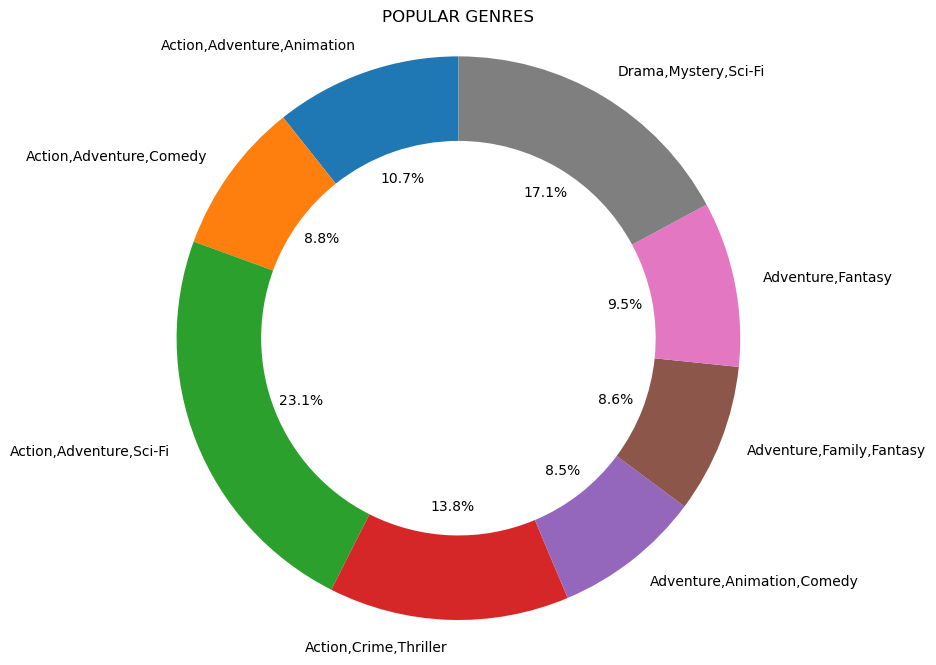

In [159]:

#Columns to use
Dough_data = {
    "Category": Popular_Movies['Genre Name'],
    "Value":Popular_Movies['popularity'],
}

Top = pd.DataFrame(Dough_data)

category_mapping = {
    'Action, Adventure, Sci-Fi': 'Action, Adventure, Sci-Fi',
    'Action, Crime, Thriller': 'Action, Crime, Thriller',
    'Action, Adventure, Animation': 'Action, Adventure, Animation',
    'Adventure, Fantasy': 'Adventure, Fantasy',
    'Action, Adventure, Comedy': 'Action, Adventure, Comedy',
    'Drama, Mystery, Sci-Fi': 'Drama, Mystery, Sci-Fi',
    'Adventure, Family, Fantasy': 'Adventure, Family, Fantasy',
    'Adventure, Animation, Comedy': 'Adventure, Animation, Comedy',
}

# Apply the category mapping to combine similar categories
Top['Category'] = Top['Category'].map(category_mapping).fillna(Top['Category'])

# Group and aggregate the data
aggregate_data = Top.groupby('Category')['Value'].sum().reset_index()

plt.figure(figsize=(8, 8))

# Draw the outer pie chart
plt.pie(aggregate_data['Value'], labels=aggregate_data['Category'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw the inner pie chart (donut hole)
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal, so the pie is drawn as a circle.
plt.axis('equal')
plt.title('POPULAR GENRES')
plt.show()

                                                                             


In [ ]:
#Conclusions